### Load data

In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('df_formation_energy.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 1857


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,formation_energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1097787,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-1.973249
mp-1173887,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1.665073
mp-1174012,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-1.740591
mp-1174016,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-1.725169
mp-1174104,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1.684774


In [3]:
target = 'formation_energy_per_atom' 

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

formation_energy_per_atom
Max value: 5.248122825
Min value: -4.513887792


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\formation_energy


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/formation_energy_per_atom_results/df_test_formation_energy_per_atom.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/formation_energy_per_atom_results/df_test_formation_energy_per_atom_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  formation_energy_per_atom
No. of exploratory features:  1857


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 31350
   Metric score:  -0.08653
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 31350
   Metric score:  -0.08407
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 31350
   Metric score:  -0.09188


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 31350
   Metric score:  -0.12955


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. o

LGBMRegressor(importance_type='gain', learning_rate=0.2, n_estimators=500,
              num_leaves=40, objective='regression')

Result saved as: feature_relevance_score_formation_energy_per_atom.pkl
Figure saved as: feature_relevance_plot_formation_energy_per_atom.png


,feature,relevance_score
0,143,71075.169761
1,441,9488.251647
2,438,3985.180338
3,chalcogen,3036.276578
4,198,2315.434054
...,...,...
1852,691,0.000000
1853,692,0.000000
1854,695,0.000000
1855,696,0.000000


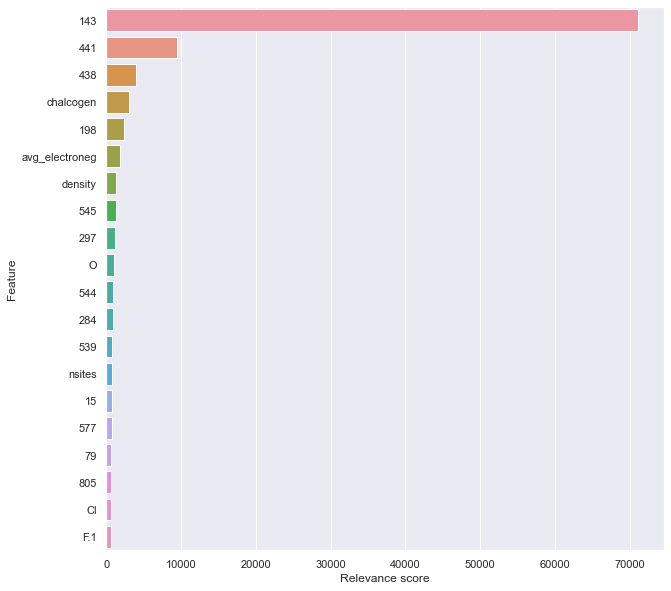

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  31350
No. of features considering:  1

n=1: mae_train=0.5639, mae_validation=0.5775 
n=1: mse_train=0.6443, mse_validation=0.6947 
n=1: rmse_train=0.8027, rmse_validation=0.8335 
n=1: r2_train=0.5620, r2_validation=0.5377 
n=1: max_error_train=5.9508, max_error_validation=5.0185 
--- 0.7807092666625977 seconds --- 

No. of features considering:  2

n=2: mae_train=0.4629, mae_validation=0.5658 
n=2: mse_train=0.4003, mse_validation=0.5856 
n=2: rmse_train=0.6327, rmse_validation=0.7652 
n=2: r2_train=0.7279, r2_validation=0.6103 
n=2: max_error_train=4.8725, max_error_validation=4.3459 
--- 0.5945405960083008 seconds --- 

No. of features considering:  3

n=3: mae_train=0.3645, mae_validation=0.5900 
n=3: mse_train=0.2634, mse_validation=0.6252 
n=3: rmse_train=0.5132, rmse_validation=0.7907 
n=3: r2_train=0.8210, r2_validation=0.5839 
n=3: max_error_train=3.3656, max_error_validation=4.0033 
--- 0.611555814743042 seconds --- 

No. of no improvements:  1

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.563876,0.577527,0.644342,0.694713,0.802709,0.833495,0.562028,0.537668,5.950775,5.018545
2,0.462862,0.565842,0.400349,0.585574,0.632732,0.765228,0.727875,0.610300,4.872518,4.345933
3,0.364465,0.589966,0.263364,0.625245,0.513190,0.790724,0.820986,0.583900,3.365594,4.003340
4,0.335877,0.545314,0.221194,0.547102,0.470313,0.739663,0.849650,0.635904,3.719467,4.225731
5,0.239360,0.425994,0.128644,0.360024,0.358669,0.600020,0.912558,0.760404,3.712377,3.637432
...,...,...,...,...,...,...,...,...,...,...
195,0.048238,0.218307,0.005463,0.089605,0.073910,0.299341,0.996287,0.940368,1.636817,2.563361
196,0.048885,0.220740,0.005608,0.090740,0.074887,0.301231,0.996188,0.939613,1.676718,2.469868
197,0.048762,0.216687,0.005755,0.088268,0.075859,0.297099,0.996089,0.941258,1.851820,2.434931


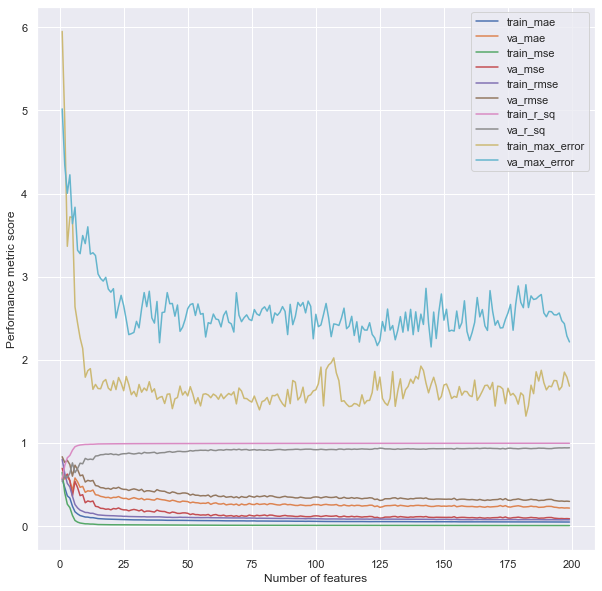

Result saved as: GBFS_convergence_plot_formation_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

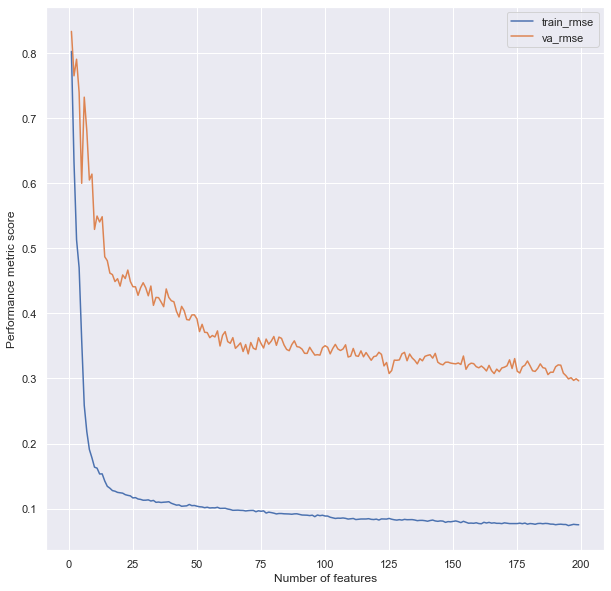

Result saved as: GBFS_convergence_plot_formation_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

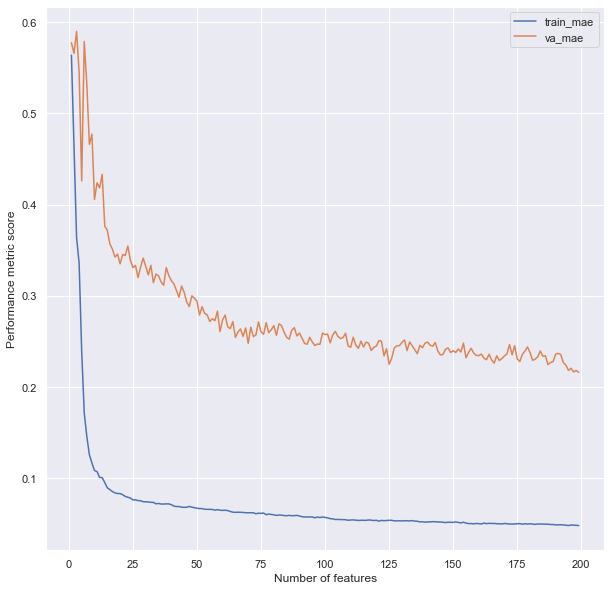

Result saved as: GBFS_convergence_plot_formation_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

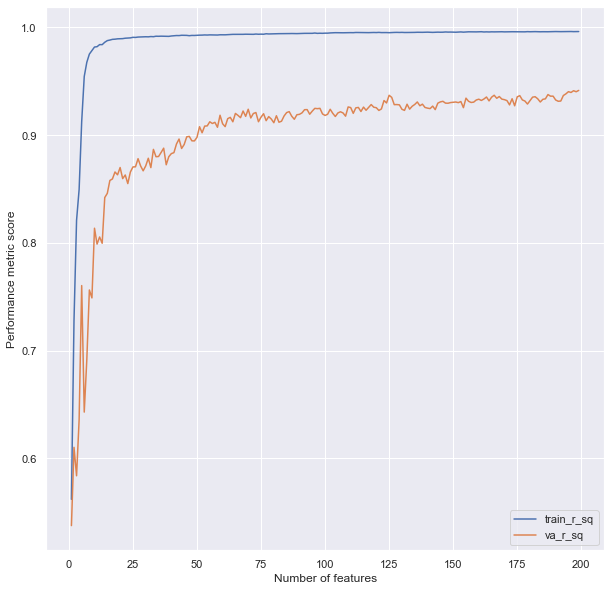

Result saved as: GBFS_convergence_plot_formation_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [21]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  formation_energy_per_atom
No. of exploratory features:  1857


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  106


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,bravais_ohe_I,bravais_ohe_P,bravais_ohe_R,glide_x_ohe_a,glide_x_ohe_b,glide_x_ohe_c,glide_x_ohe_d,glide_x_ohe_n,glide_y_ohe_a,formation_energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-18320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.708963
mp-10606,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.341479
mp-752631,0.4,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.458973
mp-631334,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.569002
mp-558611,0.2,0.5,1.0,0.0,1.0,0.0,0.6,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.505742


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  19
No. of numerical features:  1733 

Considering only the numerical features. 



c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Result saved as:  ANOVA_F_test_result_formation_energy_per_atom_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,O,40452.019217,1.000000e+00
1,chalcogen,38097.991126,9.418069e-01
2,143,35695.610267,8.824185e-01
3,229,35695.610267,8.824185e-01
4,avg_electroneg,31241.252929,7.723039e-01
...,...,...,...
1670,V,0.055270,1.365988e-06
1671,873,0.012082,2.983608e-07
1672,1465,0.003846,9.474784e-08
1673,828,0.001383,3.387624e-08


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  19
No. of numerical features:  1733 

Result saved as: MI_result_formation_energy_per_atom.pkl


,feature_names,MI,MI_scaled
0,345,0.907219,1.000000
1,250,0.905347,0.997937
2,361,0.893868,0.985283
3,8,0.889826,0.980827
4,189,0.881714,0.971886
...,...,...,...
1728,821,0.000000,0.000000
1729,822,0.000000,0.000000
1730,826,0.000000,0.000000
1731,828,0.000000,0.000000


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd

In [2]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path + 'df_formation_energy.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,O,40452.019217,1.000000
1,chalcogen,38097.991126,0.941807
2,143,35695.610267,0.882419
3,229,35695.610267,0.882419
4,avg_electroneg,31241.252929,0.772304


In [4]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,345,0.907219,1.000000
1,250,0.905347,0.997937
2,361,0.893868,0.985283
3,8,0.889826,0.980827
4,189,0.881714,0.971886


In [5]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,143,71075.169761
1,441,9488.251647
2,438,3985.180338
3,chalcogen,3036.276578
4,198,2315.434054


In [6]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  formation_energy_per_atom
No. of exploratory features:  1857


In [7]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['O', 'chalcogen', '143', '229', 'avg_electroneg', '345', '250', '361', '8', '189', '143', '441', '438', 'chalcogen', '198']


In [8]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,438/189,189/198,198/189,441/438,438/441,441/198,198/441,438/198,198/438,formation_energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1097787,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.320202,3.364765,0.297198,0.264733,3.777387,0.285224,3.506012,1.077403,0.928158,-1.973249
mp-1173887,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.282527,3.295750,0.303421,0.336841,2.968759,0.313646,3.188306,0.931140,1.073952,-1.665073
mp-1174012,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.279387,3.295750,0.303421,0.346168,2.888774,0.318748,3.137278,0.920790,1.086024,-1.740591
mp-1174016,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.281968,3.295750,0.303421,0.336256,2.973922,0.312482,3.200184,0.929297,1.076082,-1.725169
mp-1174104,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.283997,3.295750,0.303421,0.328686,3.042417,0.307644,3.250505,0.935983,1.068396,-1.684774


In [9]:
perform.save()

Result saved as: df_formation_energy_per_atom_engineered_features.pkl
Result saved as: features_formation_energy_per_atom_engineered.pkl
Result saved as: df_train_formation_energy_per_atom_engineered.pkl
Result saved as: df_test_formation_energy_per_atom_engineered.pkl


#### Multi-Collinearity Reduction

In [10]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [11]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 200 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

200
156


356

In [12]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  formation_energy_per_atom
No. of exploratory features:  356


In [13]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  144
Features saved as: features_selected_from_correlation_analysis_formation_energy_per_atom.pkl


Figure saved as: Dendrogram_formation_energy_per_atom.png


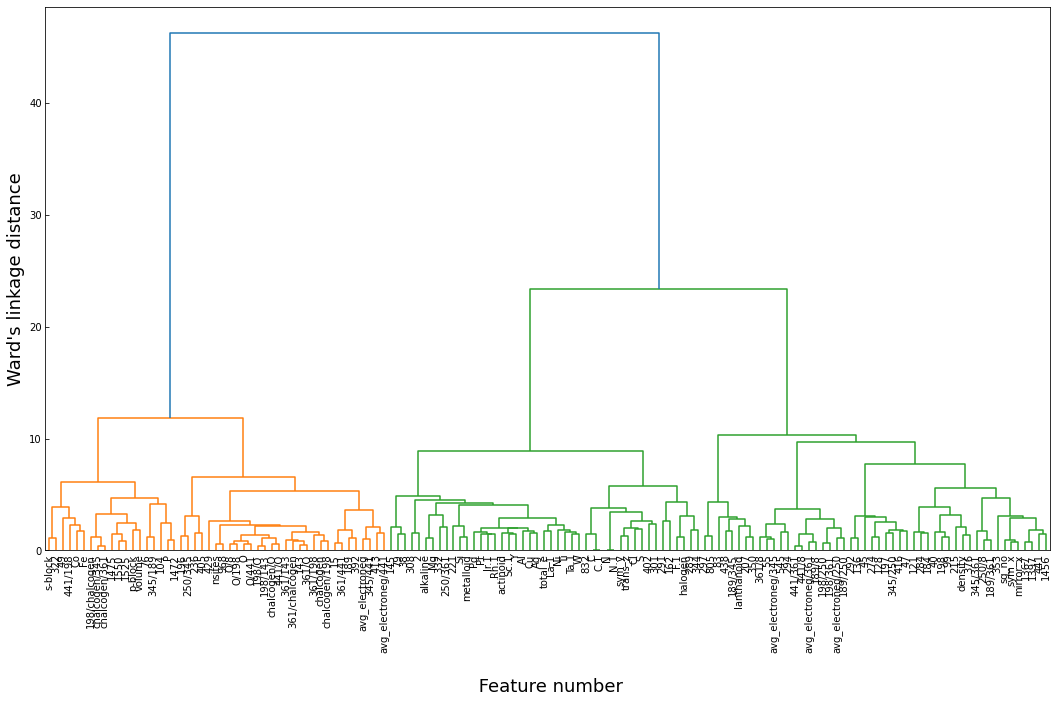

In [14]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [15]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  121
Features saved as features_selected_from_hierarchical_analysis_formation_energy_per_atom_threshold_1.pkl
Number of features remaining:  62
Features saved as features_selected_from_hierarchical_analysis_formation_energy_per_atom_threshold_2.pkl
Number of features remaining:  35
Features saved as features_selected_from_hierarchical_analysis_formation_energy_per_atom_threshold_3.pkl
Number of features remaining:  22
Features saved as features_selected_from_hierarchical_analysis_formation_energy_per_atom_threshold_4.pkl
Number of features remaining:  13
Features saved as features_selected_from_hierarchical_analysis_formation_energy_per_atom_threshold_5.pkl


In [16]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 62


In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 5.205960005
Min value: -4.506763653


In [7]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 6
        min_value = -6

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Formation Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Formation Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-1, 1.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(1.5, -1, r'$y = ' + str(round(results.params[1],3)) + 'x ' + str(round(results.params[0],3)) + '$', fontdict=font2)

        xx = 12.5
        r2 = r2_score(X, Y)
        ax_scatter.text(0, -4.7, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(0, -5.3, r'$MAE$ = ' + str(round(mae,3)) + '$eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(0, -6, r'$RMSE$ = ' + str(round(mse,3)) + '$eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.289e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                 1468.1
No. Observations:                9798   AIC:                            -2932.
Df Residuals:                    9796   BIC:                            -2918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0388      0.003    -13.215      0.0

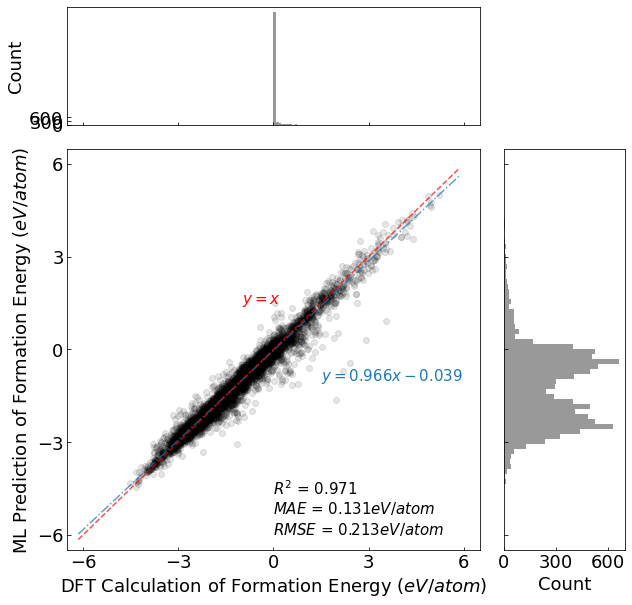

m =  0.9656140604978999
c =  -0.03878325774723196 

MAE:  0.13119872179501346
MSE:  0.04524500085190658
RMSE:  0.2127087230273046
R-squared:  0.9710381197372623
Max error:  3.6283767987843314
Explained_variance_score:  0.9710438324669746


In [8]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

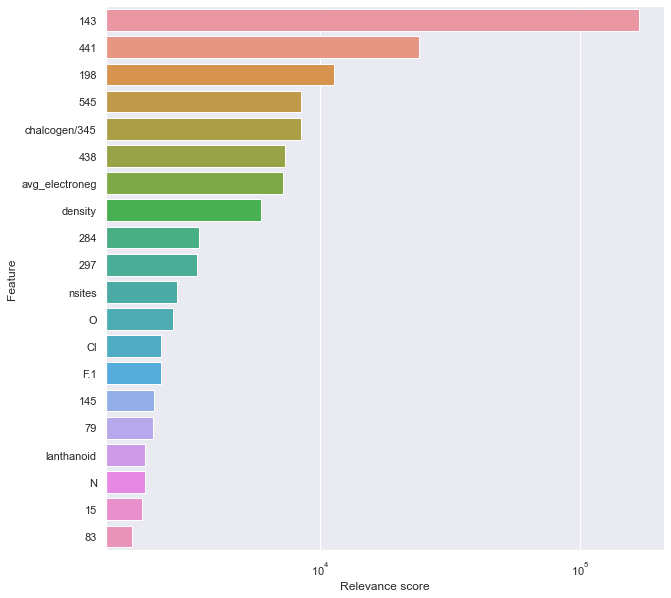

In [9]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Recursive Feature Elimination

In [26]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [27]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [28]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: formation_energy_per_atom
No. of features: 62


In [29]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 fe

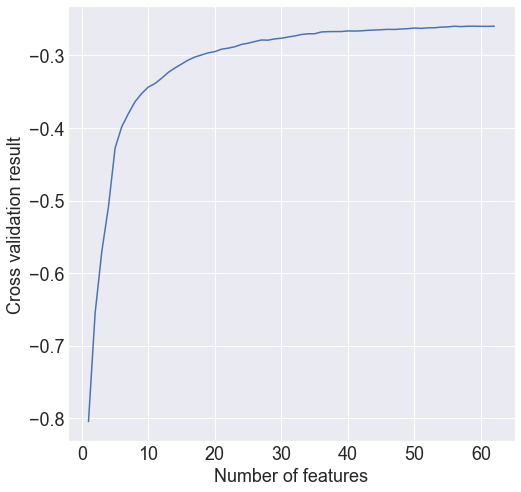

Figure saved as: RFE_plot_formation_energy_per_atom.png


In [30]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  formation_energy_per_atom
No. of exploratory features:  59


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.312680987420557, 'n_estimators': 216, 'num_leaves': 23} 

Score:  0.2297476872456799 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.3408
Function value obtained: 0.2297
Current minimum: 0.2297
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.07298480908011679, 'n_estimators': 195, 'num_leaves': 11} 

Score:  0.2985468816190382 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.3769
Function value obtained: 0.2985
Current minimum: 0.2297
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.01986700755196052, 'n_estimators': 678, 'num_leaves': 68} 

Score:  0.2239794659644451 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 9.3392
Function value obtained: 0.2240
Current minimum: 0.2240
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.980003

Saved: Optimisation_result_formation_energy_per_atom.png


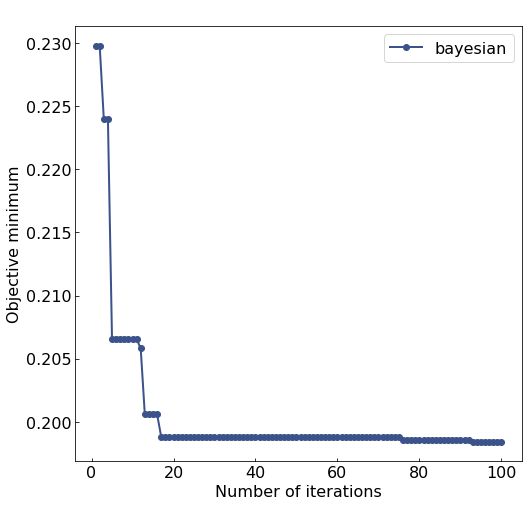

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

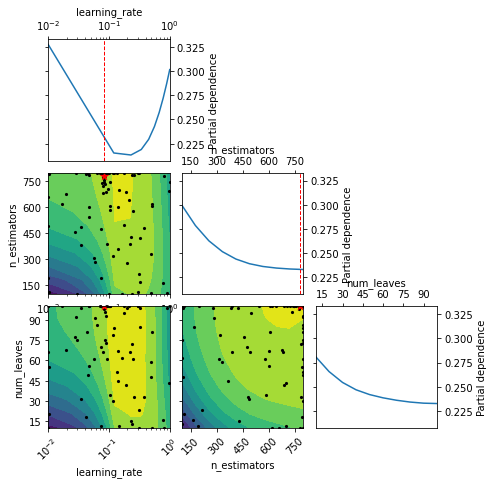

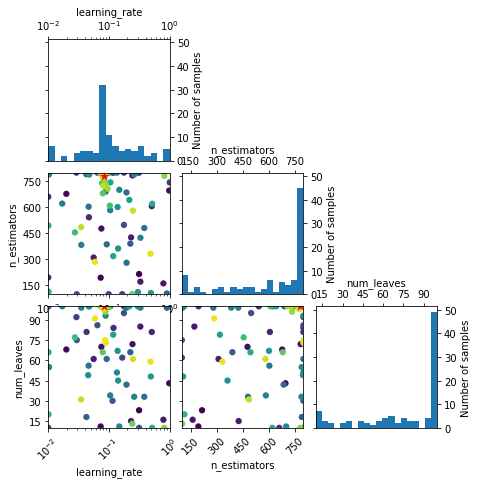

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.08193345824288818,
              n_estimators=779, num_leaves=100, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.991e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:27:38   Log-Likelihood:                 2347.8
No. Observations:                9798   AIC:                            -4692.
Df Residuals:                    9796   BIC:                            -4677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

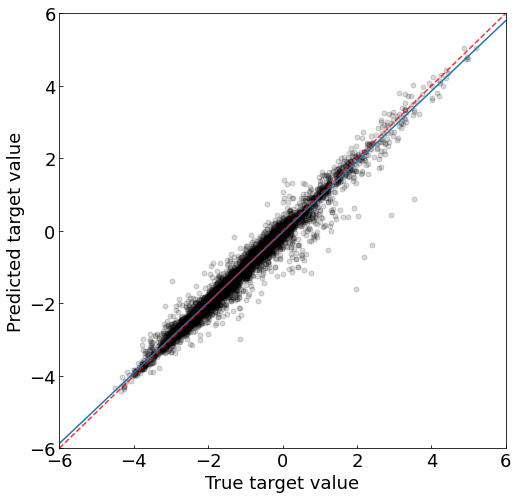

Saved: regression_plot_formation_energy_per_atom.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 6,
                    min_value = -6
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'formation_energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/formation_energy/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

59


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.08193345824288818,
                    n_estimators=779,
                    num_leaves=100,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.08193345824288818,
              n_estimators=779, num_leaves=100, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 5.205960005
Min value: -4.506763653


In [6]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 6
        min_value = -6

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10), dpi=500) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Formation Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Formation Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_test, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-1, 1.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(1.5, -1, r'$y = ' + str(round(results.params[1],3)) + 'x ' + str(round(results.params[0],3)) + '$', fontdict=font2)

        xx = 12.5
        r2 = r2_score(X, Y)
        ax_scatter.text(0.5, -4.7, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(0.5, -5.3, r'$MAE$ = ' + str(round(mae,3)) + '$eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(0.5, -6, r'$RMSE$ = ' + str(round(mse,3)) + '$eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.945e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:52:52   Log-Likelihood:                 2284.4
No. Observations:                9798   AIC:                            -4565.
Df Residuals:                    9796   BIC:                            -4550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0326      0.003    -12.086      0.0

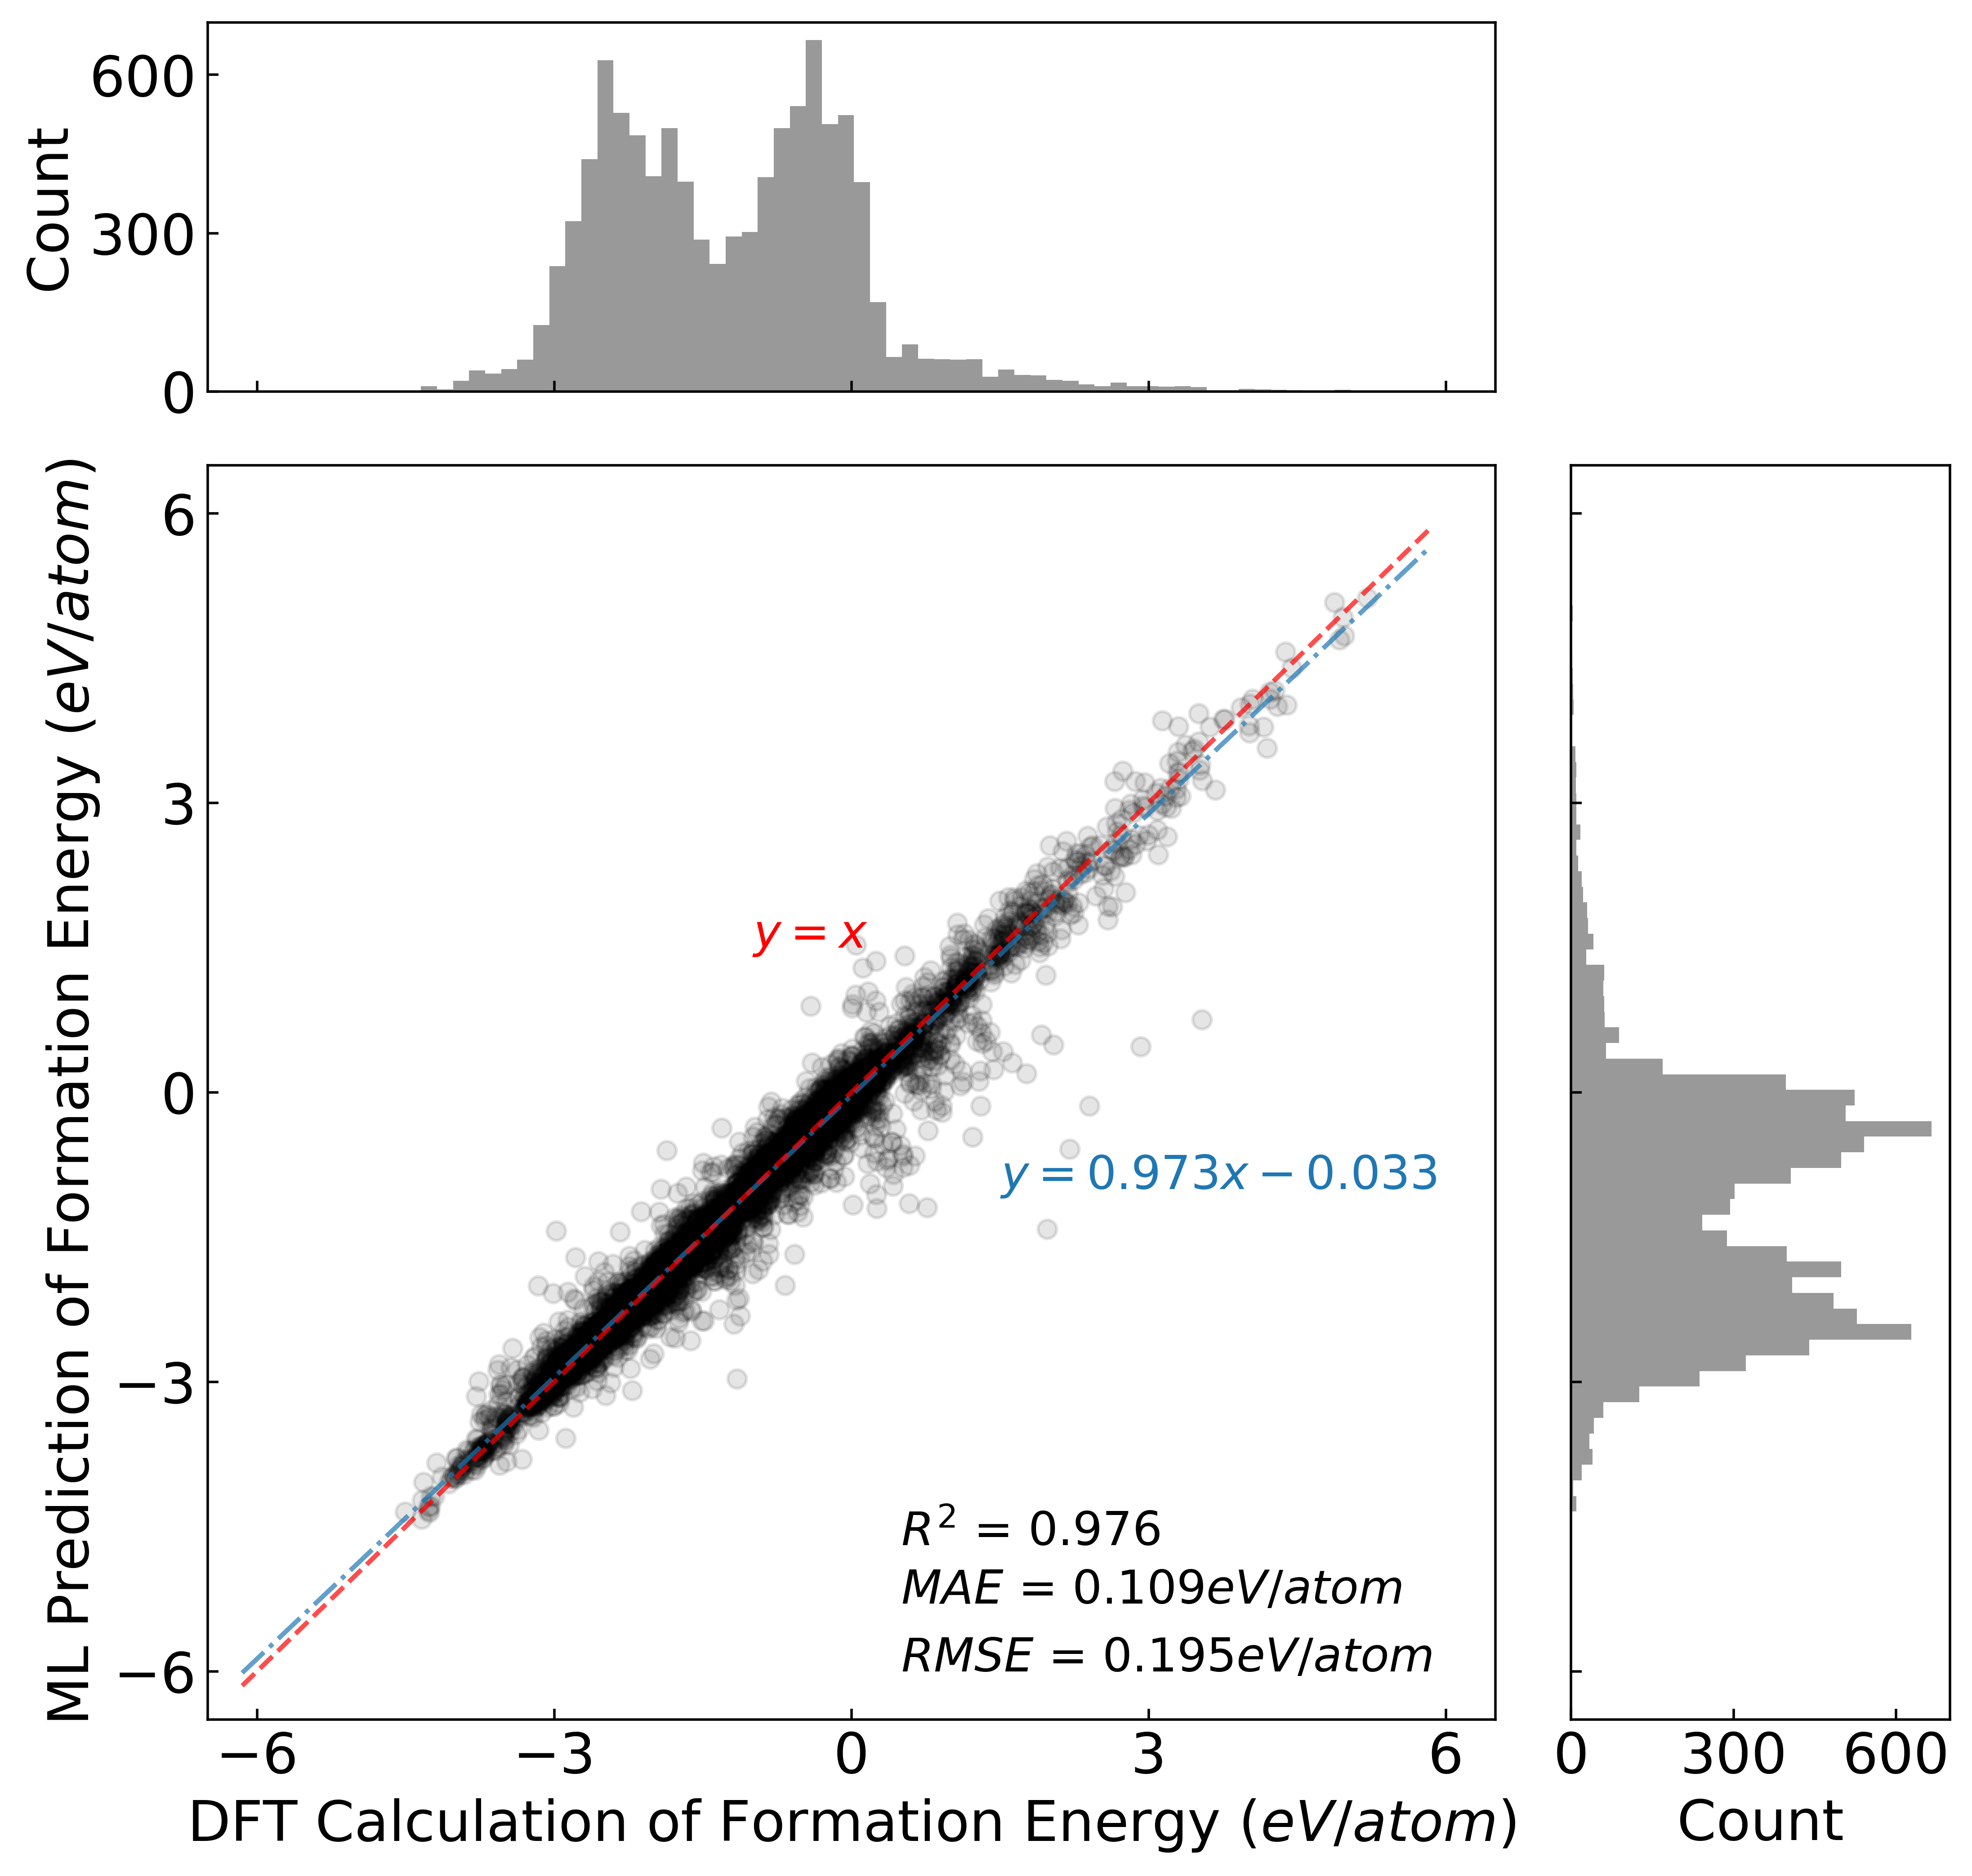

m =  0.9730073618568617
c =  -0.03263537655058692 

MAE:  0.10949421632246548
MSE:  0.03786807605614337
RMSE:  0.19459721492391244
R-squared:  0.9757601798238875
Max error:  3.397404951974621
Explained_variance_score:  0.9757601950438192


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

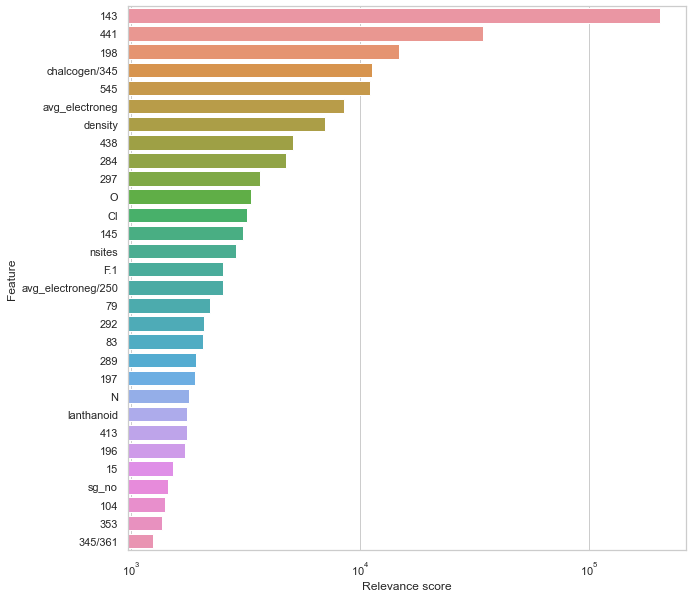

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)